In [97]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
# load
user= pd.read_csv("C:/Users/chenl/Data Science prep/data/user_table - Funnel Analysis.csv")
home= pd.read_csv("C:/Users/chenl/Data Science prep/data/home_page_table - Funnel Analysis.csv")
search= pd.read_csv("C:/Users/chenl/Data Science prep/data/search_page_table - Funnel Analysis.csv")
payment= pd.read_csv("C:/Users/chenl/Data Science prep/data/payment_page_table- Funnel Analysis.csv")
confirmation= pd.read_csv("C:/Users/chenl/Data Science prep/data/payment_confirmation_table -Funnel Analysis.csv")

In [99]:
print(user.head())
print(home.head())
print(search.head())
print(payment.head())
print(confirmation.head())

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


In [100]:
len(user)==user["user_id"].nunique()
# one record per user, 90400 home record as well, log in 

True

# processing

In [101]:
data=pd.merge(user,home,how="left",on="user_id")
data=pd.merge(data,search,how="left",on="user_id",suffixes=("_home","_search"))
data=pd.merge(data,payment,how="left",on="user_id")
data=pd.merge(data,confirmation,how="left",on="user_id",suffixes=("_payment","_confirm"))
data

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirm
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,home_page,search_page,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,home_page,NaN,NaN,NaN


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       90400 non-null  int64 
 1   date          90400 non-null  object
 2   device        90400 non-null  object
 3   sex           90400 non-null  object
 4   page_home     90400 non-null  object
 5   page_search   45200 non-null  object
 6   page_payment  6030 non-null   object
 7   page_confirm  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 5.5+ MB


# analysis

In [103]:
# overall conversion rate.
levels=["page_home","page_search","page_payment","page_confirm"]
conversion=[]
for i in range(1,4):
    count=len(data)-data[levels[i]].isnull().sum()
    rate=count/(len(data)-data[levels[i-1]].isnull().sum())
    conversion.append([levels[i],count,rate])
conversion_rate=pd.DataFrame(conversion,columns=["next funnel","total users","conversion_rate"])
# conversion_rate["next funnel"]=levels[1:4]

conversion_rate
    
# conversion rate from prior page decrese from 50% to 13% to 7%

,next funnel,total users,conversion_rate
0,page_search,45200,0.500000
1,page_payment,6030,0.133407
2,page_confirm,452,0.074959


In [104]:
# conversion rate via original base, def function
levels=["page_home","page_search","page_payment","page_confirm"]
def conversion_cal(data):
    conversion=[]
    for i in range(4):
        count=len(data)-data[levels[i]].isnull().sum()
        rate=count/(len(data))
        conversion.append([levels[i],count,rate])
    conversion_df=pd.DataFrame(conversion,columns=["funnel","total users","conversion_rate"])
    return conversion_df
conversion_rate_overall=conversion_cal(data)
conversion_rate_overall

,funnel,total users,conversion_rate
0,page_home,90400,1.000000
1,page_search,45200,0.500000
2,page_payment,6030,0.066704
3,page_confirm,452,0.005000


# conversion rate via device, sex and date (day of the week)

In [105]:
# device
desk  =data[data["device"]=="Desktop"]
mobile=data[data["device"]=="Mobile"]

desk_df=conversion_cal(desk)
mobile_df=conversion_cal(mobile)
device_df=pd.merge(desk_df,mobile_df,how="inner",on="funnel",suffixes=('_desk', '_mobile'))
device_df

,funnel,total users_desk,conversion_rate_desk,total users_mobile,conversion_rate_mobile
0,page_home,60200,1.000000,30200,1.00
1,page_search,30100,0.500000,15100,0.50
2,page_payment,3010,0.050000,3020,0.10
3,page_confirm,150,0.002492,302,0.01


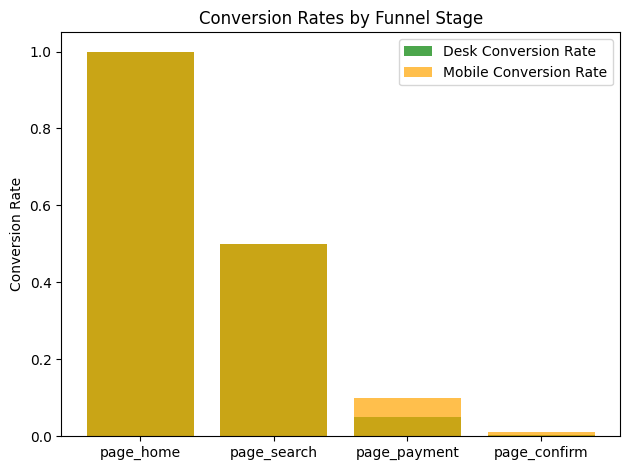

In [106]:
# Plotting conversion rates
plt.bar(device_df["funnel"], device_df["conversion_rate_desk"], label="Desk Conversion Rate", alpha=0.7,color="green")
plt.bar(device_df["funnel"], device_df["conversion_rate_mobile"], label="Mobile Conversion Rate", alpha=0.7,color="orange")

plt.ylabel("Conversion Rate")
plt.title("Conversion Rates by Funnel Stage")
plt.legend()

plt.tight_layout()
plt.show()
# conversion rate to search is indifferent, but payment and confirm are high for mobile users

In [107]:
# sex
male  =data[data["sex"]=="Male"]
female=data[data["sex"]=="Female"]

male_df=conversion_cal(male)
female_df=conversion_cal(female)
sex_df=pd.merge(desk_df,mobile_df,how="inner",on="funnel",suffixes=('_male', '_female'))
sex_df

,funnel,total users_male,conversion_rate_male,total users_female,conversion_rate_female
0,page_home,60200,1.000000,30200,1.00
1,page_search,30100,0.500000,15100,0.50
2,page_payment,3010,0.050000,3020,0.10
3,page_confirm,150,0.002492,302,0.01


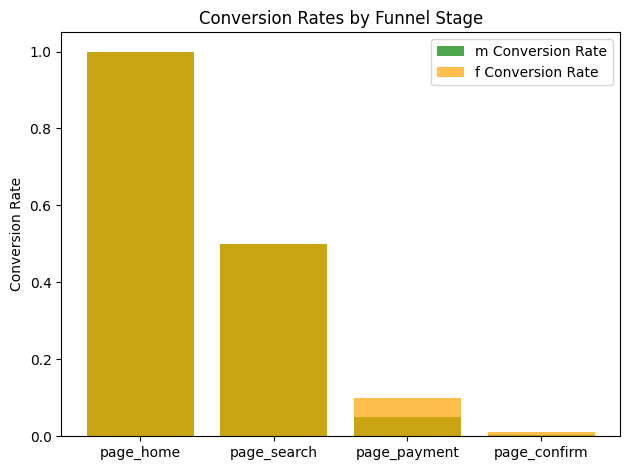

In [108]:
# Plotting conversion rates
plt.bar(sex_df["funnel"], sex_df["conversion_rate_male"], label="m Conversion Rate", alpha=0.7,color="green")
plt.bar(sex_df["funnel"], sex_df["conversion_rate_female"], label="f Conversion Rate", alpha=0.7,color="orange")

plt.ylabel("Conversion Rate")
plt.title("Conversion Rates by Funnel Stage")
plt.legend()

plt.tight_layout()
plt.show()
# conversion rate to search is indifferent, but payment and confirm are high for female users

In [109]:
# day of the week
data["date"]=pd.to_datetime(data["date"])
data["day_of_week"]=data["date"].dt.day_name()
weekday=data.groupby("day_of_week")[["page_home","page_search",	"page_payment",	"page_confirm"]].agg(lambda x: x.count())
weekday["page_search"]=weekday["page_search"]/weekday["page_home"]
weekday["page_payment"]=weekday["page_payment"]/weekday["page_home"]
weekday["page_confirm"]=weekday["page_confirm"]/weekday["page_home"]
weekday
# may need more data to find out if the day of week show any cycle impact

,page_home,page_search,page_payment,page_confirm
day_of_week,,,,
Friday,12750,0.502431,0.068314,0.004235
Monday,12955,0.500425,0.067078,0.005944
Saturday,12801,0.511288,0.066010,0.005468
Sunday,12922,0.500077,0.066166,0.004798
Thursday,13444,0.499628,0.066870,0.004909
Tuesday,12697,0.492400,0.067181,0.005434
Wednesday,12831,0.493726,0.065311,0.004209
